In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math, time, random, datetime
import warnings
warnings.filterwarnings("ignore")

In [52]:
cust_data = pd.read_csv("ml_case_training_data.csv")
cust_churn = pd.read_csv("ml_case_training_output.csv")
cust_pay = pd.read_csv("ml_case_training_hist_data.csv")

In [53]:
# Make a copy of the origial data
copy_cust_data = cust_data
copy_cust_churn = cust_churn
copy_cust_pay = cust_pay

In [54]:
# Features the dataset
print("Cloumns in the dataset:", cust_data.columns)
print("Columns in the churn indicator:", cust_churn.columns)

Cloumns in the dataset: Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max'],
      dtype='object')
Columns in the churn indicator: Index(['id', 'churn'], dtype='object')


In [55]:
# Datatypes in the dataset
cust_data.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [56]:
cust_churn.dtypes

id       object
churn     int64
dtype: object

In [57]:
copy_cust_pay.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

In [58]:
cust_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [59]:
cust_churn.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


As we can see that the Customer ID is same for both cust_data, cust_churn. We can merge these two tables using the Customer ID then we can see whether the customer is churned or not. But before merging we will see whether there are any null or missing values

In [60]:
cust_data.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [61]:
cust_churn.isnull().sum()

id       0
churn    0
dtype: int64

So two datasets have no null or missing values in Customer ID and churn columns, so now we can merge the datasets

In [62]:
cust_final_data= pd.merge(cust_data,cust_churn, on='id')

In [63]:
cust_final_data

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [64]:
cust_final_data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [65]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

drop_col = missing(cust_final_data)
drop_col

campaign_disc_ele           100.00
date_first_activ             78.21
forecast_cons                78.21
forecast_base_bill_ele       78.21
forecast_base_bill_year      78.21
forecast_bill_12m            78.21
activity_new                 59.30
channel_sales                26.21
date_modif_prod               0.98
forecast_price_pow_p1         0.78
forecast_price_energy_p2      0.78
forecast_discount_energy      0.78
forecast_price_energy_p1      0.78
origin_up                     0.54
date_renewal                  0.25
net_margin                    0.09
margin_net_pow_ele            0.08
margin_gross_pow_ele          0.08
pow_max                       0.02
date_end                      0.01
cons_last_month               0.00
cons_gas_12m                  0.00
date_activ                    0.00
cons_12m                      0.00
churn                         0.00
forecast_cons_12m             0.00
forecast_cons_year            0.00
forecast_meter_rent_12m       0.00
has_gas             

From the above drop_col we can see that some columns have many missing values or NAN, lets go ahead and remove columns with missing data more than 70%

In [66]:
cust_final_data.drop(['campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year',
                     'forecast_bill_12m', 'forecast_cons'], axis=1, inplace=True)

In [67]:
cust_final_data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [92]:
#Change the datatype of date_activ, date_end, date_modif_prod, date_renewal
cust_final_data['date_activ']=pd.to_datetime(cust_final_data['date_activ'])
cust_final_data['date_end']=pd.to_datetime(cust_final_data['date_end'])
cust_final_data['date_modif_prod']=pd.to_datetime(cust_final_data['date_modif_prod'])
cust_final_data['date_renewal']=pd.to_datetime(cust_final_data['date_renewal'])

In [76]:
activity = cust_final_data['activity_new'].value_counts()
activity

apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
ckfxocssowaeipxueikxcmaxdmcduxsa     189
                                    ... 
waixukdfidxusmdwibmxxkkxbbmbslbf       1
kpkesxdaobicuwwkukxwmdpsbowwbomd       1
wkwdccuiboaeaalcaawlwmldiwmpewma       1
klaclcdipfdkebisxwccdbdooobmiwpl       1
aplsmkockmiifibukmmmomommebkdpfk       1
Name: activity_new, Length: 419, dtype: int64

In [77]:
#channel_sales -- code of the sales channel
sales = cust_final_data['channel_sales'].value_counts()
sales

foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We can change the channel_sales into number

In [81]:
#forecast_discount_energy -- forecasted value of current discount
discount = cust_final_data['forecast_discount_energy'].value_counts()
discount

0.0     15391
30.0      280
24.0      112
28.0      102
22.0       58
25.0        7
26.0        5
19.0        4
17.0        3
50.0        2
23.0        2
10.0        2
12.0        1
5.0         1
Name: forecast_discount_energy, dtype: int64

In [82]:
sum(discount)

15970

In [83]:
antig = cust_final_data['num_years_antig'].value_counts()
antig

6     5054
4     4331
3     2757
5     2495
7      648
11     236
8      202
12     127
10     113
9      106
13      13
2       11
15       1
1        1
16       1
Name: num_years_antig, dtype: int64

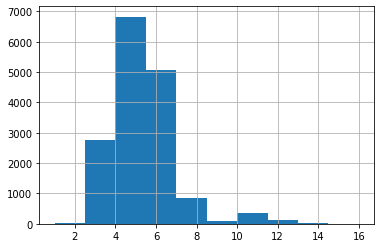

In [95]:
cust_final_data['num_years_antig'].hist()

Many Customers are 4 or 5 years with the company (average period of customer with the client)

In [85]:
tot_prod = cust_final_data['nb_prod_act'].value_counts()
tot_prod

1     12560
2      2708
3       561
4       170
5        37
32       25
9        12
6         9
8         8
31        4
10        2
Name: nb_prod_act, dtype: int64

32 and 31 are outliers-- check them

In [87]:
cust_final_data[cust_final_data['nb_prod_act']==31]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
3556,b39e4f74092094d80d6a185e279c01c5,sffadmsbuamddwapeumdfibkmpkdicmc,foosdfpfkusacimwkcsosbicdxkicaua,316796,0,30555,2013-05-26,2016-08-05,2015-08-05,2015-07-04,...,f,183.21,-0.72,-0.72,31,55.04,3,lxidpiddsbxsbosboudacockeimpuepw,11.50,0
10401,6bd8a120f9a1ea0c57ed656481141495,xpmaxkfbpsbuliopadcpsolcbdboopbf,lmkebamcaaclubfxadlmueccxoimlema,316796,0,30555,2012-06-07,2016-08-05,2015-08-05,2015-06-10,...,f,247.94,-0.20,-0.20,31,44.58,4,lxidpiddsbxsbosboudacockeimpuepw,13.86,0
12910,c2ee885669b500427c11c75ca8de0db0,sffadmsbuamddwapeumdfibkmpkdicmc,foosdfpfkusacimwkcsosbicdxkicaua,316796,0,30555,2013-06-13,2016-08-05,2015-08-05,2015-07-04,...,f,0.00,-3.48,-3.48,31,-257.49,3,lxidpiddsbxsbosboudacockeimpuepw,27.71,0
13898,cce88c7d721430d8bd31f71ae686c91e,xpmaxkfbpsbuliopadcpsolcbdboopbf,foosdfpfkusacimwkcsosbicdxkicaua,316796,0,30555,2013-06-14,2016-08-05,2015-08-05,2015-07-04,...,f,84.44,-2.82,-2.82,31,-168.54,3,lxidpiddsbxsbosboudacockeimpuepw,23.00,0


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

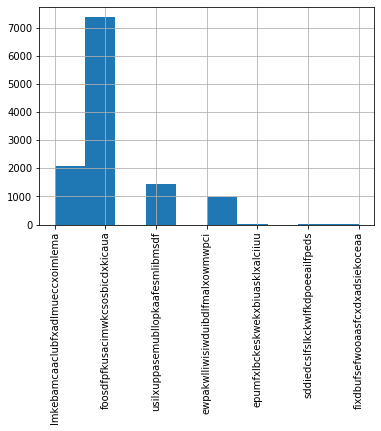

In [104]:
cust_final_data['channel_sales'].hist()
plt.xticks(rotation=90)

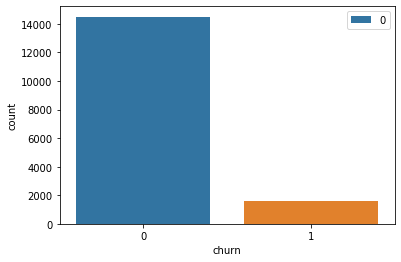

In [106]:
sns.countplot(cust_final_data.churn)
plt.legend(cust_final_data.churn)

1-churned customers

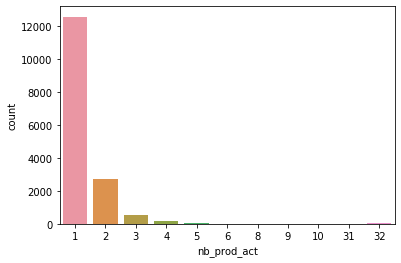

In [101]:
sns.countplot(cust_final_data.nb_prod_act)

Most customers have 1 product active

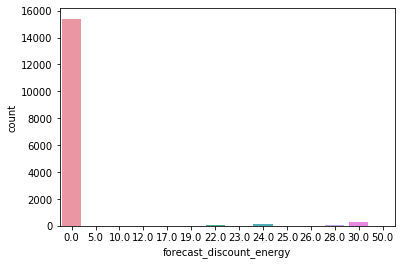

In [107]:
sns.countplot(cust_final_data.forecast_discount_energy)

Most customers are not getting any discounts

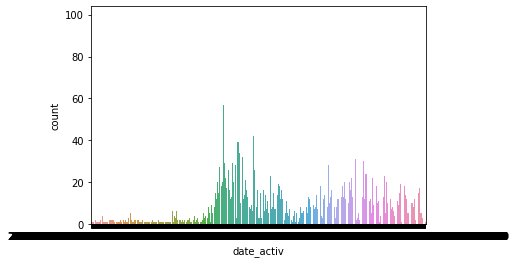

In [108]:
sns.countplot(cust_final_data.date_activ)